In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import warnings
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns
from mlxtend.plotting import plot_decision_regions # visualization library


In [3]:
# Create dataset

x, y = make_circles(n_samples=100, noise=0.1, random_state=1)

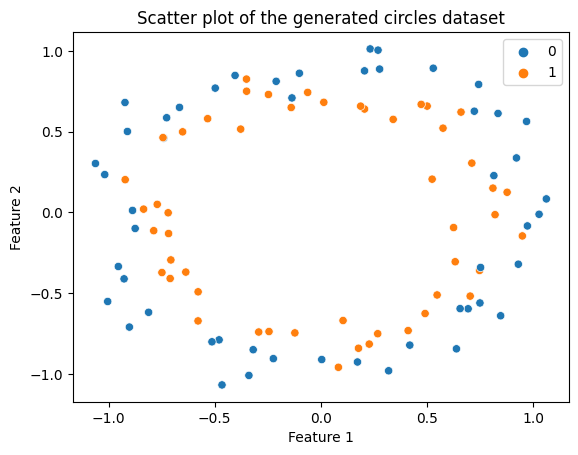

In [4]:
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter plot of the generated circles dataset")
plt.show()

In [5]:
# Splitting the data into training and testing sets
 y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=2)

In [6]:
# Create the neural network model
model = Sequential()
model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [7]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [8]:
# Fit the model to the data
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3500, verbose=1)

Streaming output truncated to the last 5000 lines.
3/3 [==============================] - 0s 27ms/step - loss: 0.2063 - accuracy: 0.9125 - val_loss: 0.6576 - val_accuracy: 0.6500
Epoch 1002/3500
3/3 [==============================] - 0s 24ms/step - loss: 0.2067 - accuracy: 0.9125 - val_loss: 0.6585 - val_accuracy: 0.6500
Epoch 1003/3500
3/3 [==============================] - 0s 23ms/step - loss: 0.2070 - accuracy: 0.9125 - val_loss: 0.6642 - val_accuracy: 0.6500
Epoch 1004/3500
3/3 [==============================] - 0s 23ms/step - loss: 0.2076 - accuracy: 0.9125 - val_loss: 0.6693 - val_accuracy: 0.6500
Epoch 1005/3500
3/3 [==============================] - 0s 22ms/step - loss: 0.2057 - accuracy: 0.9125 - val_loss: 0.6721 - val_accuracy: 0.6500
Epoch 1006/3500
3/3 [==============================] - 0s 31ms/step - loss: 0.2054 - accuracy: 0.9125 - val_loss: 0.6742 - val_accuracy: 0.6500
Epoch 1007/3500
3/3 [==============================] - 0s 30ms/step - loss: 0.2050 - accuracy: 0.9125

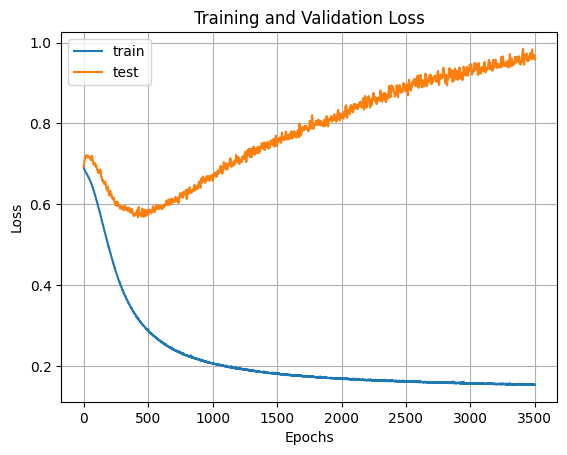

In [9]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')

# Adding legend and labels
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.grid(True)

# Display the plot
plt.show()

**More numbers of epochs create overfitting problem.**

9600/9600 [==============================] - 16s 2ms/step


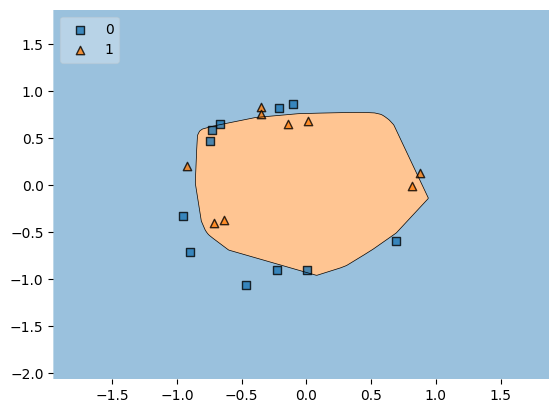

In [14]:
plot_decision_regions(x_test, y_test.ravel(), clf = model, legend=2)
plt.show()

# Early Stopping

In [16]:
# Create the neural network model

model = Sequential()
model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [17]:
# Compile the model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
# Define the EarlyStopping callback

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',          # Metric to monitor for early stopping
    min_delta=0.00001,           # Minimum change in the monitored metric to be considered improvement
    patience=28,                 # Number of epochs with no improvement before stopping
    verbose=1,                   # Verbosity mode. Set to 1 to see messages about early stopping.
    mode='auto',                 # Direction of improvement. 'auto' means it automatically detects the direction.
    baseline=None,               # If provided, training will stop if the monitored metric is lower or higher than this baseline.
    restore_best_weights=False ) # Whether to restore model weights from the epoch with the best monitored metric.

In [20]:
# Train the model with EarlyStopping callback

history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=3500,
                    callbacks=[early_stopping])

Epoch 1/3500
3/3 [==============================] - 3s 95ms/step - loss: 0.6938 - accuracy: 0.4875 - val_loss: 0.6873 - val_accuracy: 0.6500
Epoch 2/3500
3/3 [==============================] - 0s 18ms/step - loss: 0.6923 - accuracy: 0.5125 - val_loss: 0.6895 - val_accuracy: 0.5500
Epoch 3/3500
3/3 [==============================] - 0s 16ms/step - loss: 0.6900 - accuracy: 0.4875 - val_loss: 0.6904 - val_accuracy: 0.5500
Epoch 4/3500
3/3 [==============================] - 0s 25ms/step - loss: 0.6891 - accuracy: 0.5125 - val_loss: 0.6927 - val_accuracy: 0.6500
Epoch 5/3500
3/3 [==============================] - 0s 24ms/step - loss: 0.6881 - accuracy: 0.5875 - val_loss: 0.6948 - val_accuracy: 0.5500
Epoch 6/3500
3/3 [==============================] - 0s 17ms/step - loss: 0.6876 - accuracy: 0.6250 - val_loss: 0.6966 - val_accuracy: 0.5000
Epoch 7/3500
3/3 [==============================] - 0s 17ms/step - loss: 0.6865 - accuracy: 0.5750 - val_loss: 0.6984 - val_accuracy: 0.5000
Epoch 8/3500


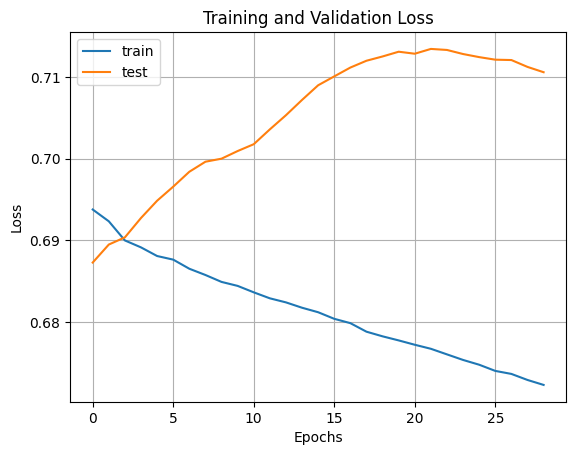

In [21]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')

# Adding legend and labels
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.grid(True)

# Display the plot
plt.show()

9600/9600 [==============================] - 14s 1ms/step


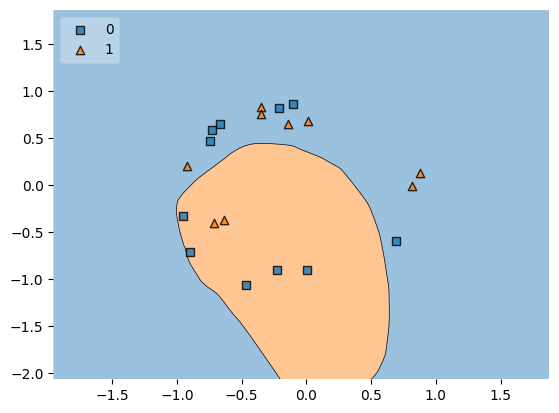

In [22]:
plot_decision_regions(x_test, y_test.ravel(), clf = model, legend=2)
plt.show()